In [53]:
#import all the necessary librariers

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
#Style properites 
sns.set_style('darkgrid')
plt.rcParams['font.size']= 15
plt.rcParams['figure.figsize']= (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'                              

In [12]:
data_set = pd.read_csv('happiness_score_dataset.csv')

In [ ]:
#Disply the details of the Data_set

In [13]:
data_set.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [57]:
#Selecting the necessary columns

In [14]:
data_set_columns =['Country','Region','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Freedom',
                  'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

In [15]:
data_set = data_set[data_set_columns].copy()

In [ ]:
#Renaming the columns

In [40]:
happy_df=data_set.rename(columns={'Country':'Country', 'Happiness Score':'Happiness_Score','Economy (GDP per Capita)':'Economy_GDP',
                         'Health (Life Expectancy)':'Health_Life_Expectancy','Freedom':'Freedom','Trust (Government Corruption)':
                         'Trust_Government_Corruption','Generosity':'Generosity','Dystopia Residual':'Dystopia_Residual'})

In [58]:
#to check the any column has null values and sum for each of the columns

In [41]:
happy_df.isnull().sum()

Country                        0
Region                         0
Happiness_Score                0
Economy_GDP                    0
Health_Life_Expectancy         0
Freedom                        0
Trust_Government_Corruption    0
Generosity                     0
Dystopia_Residual              0
dtype: int64

Text(0, 0.5, 'Economy_GDP')

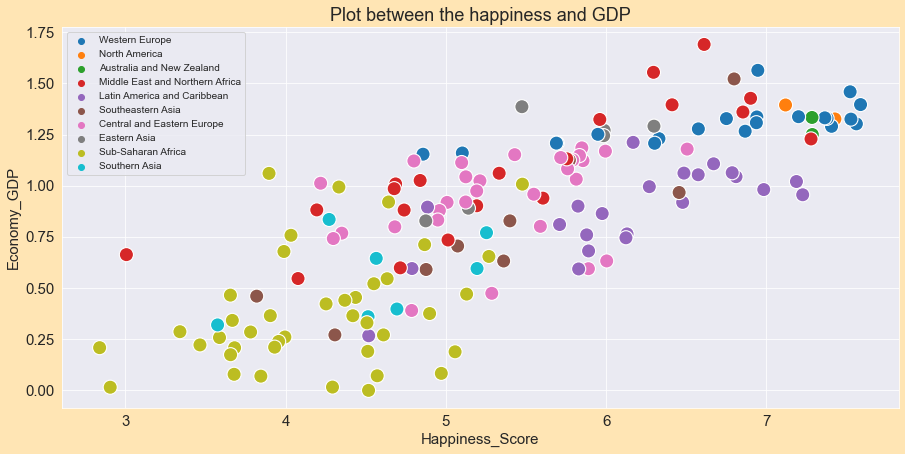

In [42]:
#visualtions
#plot between the happiness and GDP for different regions

plt.rcParams['figure.figsize'] =(15,7)
plt.title('Plot between the happiness and GDP')
sns.scatterplot(x= happy_df.Happiness_Score, y=happy_df.Economy_GDP, hue=happy_df.Region, s =200);

plt.legend(loc ='upper left', fontsize ='10')
plt.xlabel('Happiness_Score')
plt.ylabel('Economy_GDP')

In the above plot we can find the western Europe has the highest happiness score and highest GDP and the sub saharan Africa has the lowest happiness score and lowest GDP

In [43]:
#sum the GDP values for the region and plotting in the form of Pie chart
dp_region = happy_df.groupby('Region')['Economy_GDP'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy_GDP, dtype: float64

Text(0, 0.5, '')

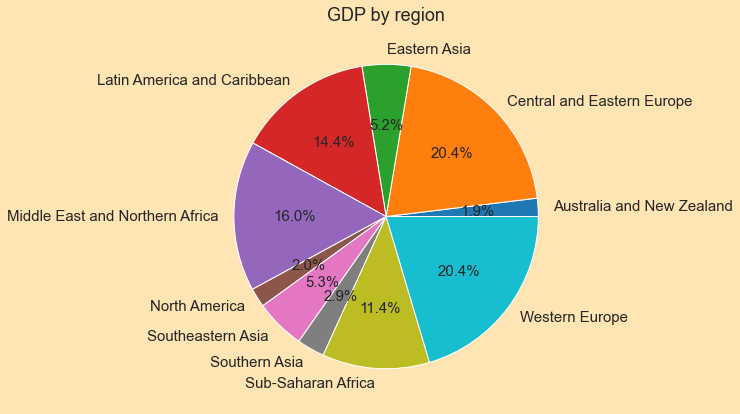

In [44]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP by region')
plt.ylabel('')

In [26]:
#total Counttries in each region
total_country = happy_df.groupby('Region')[['Country']].count()
print(total_country)


                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


<ipython-input-27-16e73c1b704a>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap="Blues", square=True, ax=ax)


<AxesSubplot:>

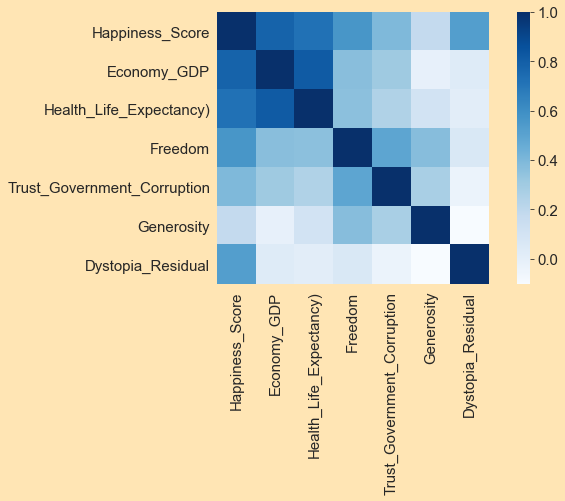

In [27]:
#correlation map using Pearson correlation coefficient 
#Pearson's correlation coefficient is the covariance of the two variables divided by the
#product of their standard deviations. The form of the definition involves a "product moment",
#that is, the mean (the first moment about the origin) of the product of the mean-adjusted random
#variables; hence the modifier product-moment in the name

cor=happy_df.corr(method='pearson')
f, ax =plt.subplots(figsize =(10, 5))
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap="Blues", square=True, ax=ax)

In [ ]:
#from the above plot has very low correlations between happiness score and corruption 

In [28]:
#corruption in different regions 

corruption = happy_df.groupby('Region')[['Trust_Government_Corruption']].mean()
corruption

,Trust_Government_Corruption
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

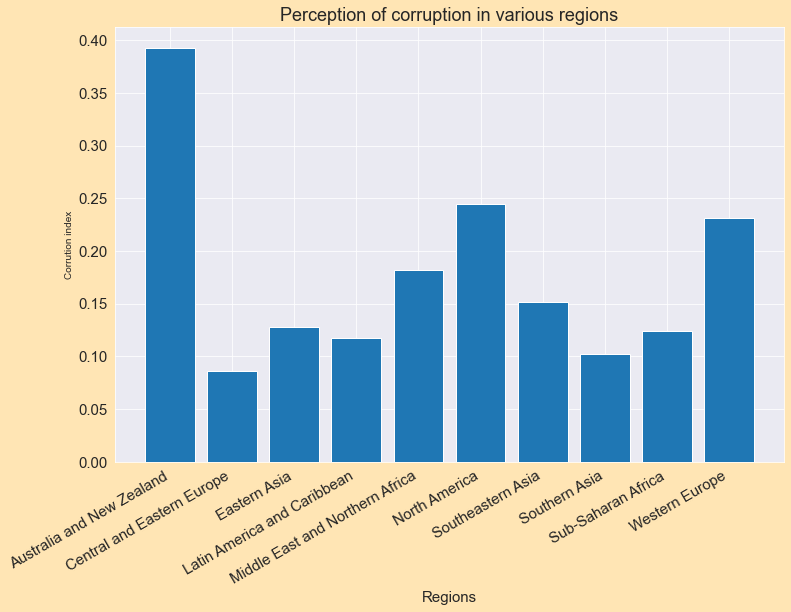

In [33]:
plt.rcParams['figure.figsize'] =(12, 8)
plt.title('Perception of corruption in various regions')
plt.xlabel('Regions', fontsize =15)
plt.ylabel('Corrution index',fontsize=10)
plt.xticks(rotation =30, ha ='right')
plt.bar(corruption.index, corruption.Trust_Government_Corruption)


In [ ]:
# from the above bar chart we can find the Australia dn New Zealand has the highest corruption and 
#least corruption in central and eastern europe

In [45]:
#top 10 countries

top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)


<ipython-input-47-9a0233c8838f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
<ipython-input-47-9a0233c8838f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation=45, ha='right')


Text(599.1068181818181, 0.5, 'Life Expectancy')

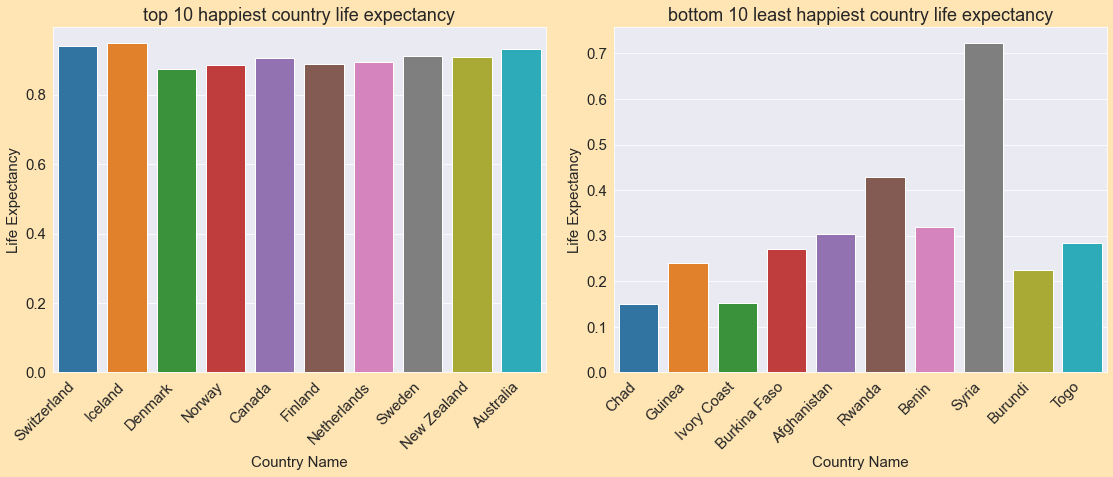

In [47]:
fig, axes =plt.subplots(1,2, figsize=(16, 6))
plt.tight_layout(pad= 2)
xlabels = top_10.Country
axes[0].set_title(('top 10 happiest country life expectancy'))
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=top_10.Country, y=top_10.Health_Life_Expectancy, ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabels = bottom_10.Country
axes[1].set_title(('bottom 10 least happiest country life expectancy'))
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.Country, y=bottom_10.Health_Life_Expectancy, ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')


Text(0, 0.5, 'Happiness Score')

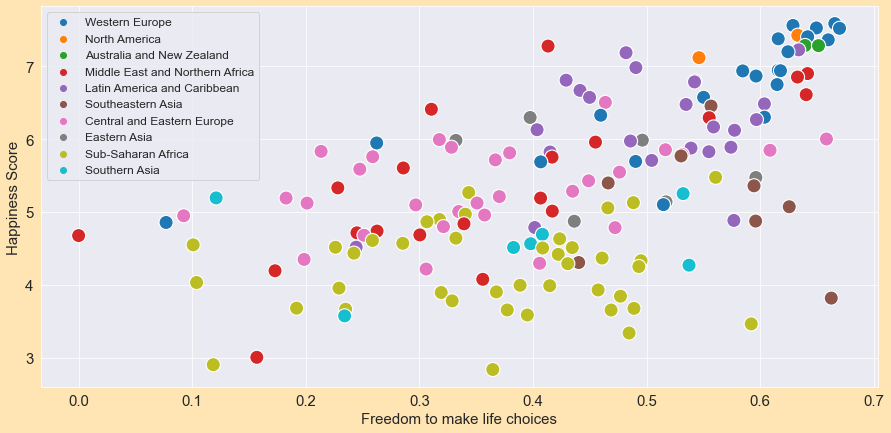

In [50]:
#plot for the freedom and happiness score
plt.rcParams['figure.figsize'] = (15, 7)

sns.scatterplot(x= happy_df.Freedom, y=happy_df.Happiness_Score, hue=happy_df.Region, s=200)
plt.legend(loc ='upper left', fontsize='12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')


In [ ]:
#from the above plot we can make out that the western Europe countries freedom to make choices is more

<BarContainer object of 10 artists>

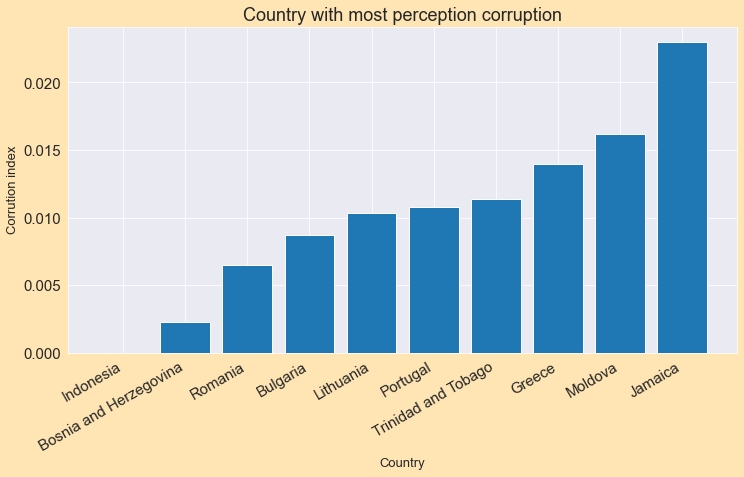

In [51]:
country = happy_df.sort_values(by='Trust_Government_Corruption').head(10)
plt.rcParams['figure.figsize'] =(12,6)
plt.title('Country with most perception corruption')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Corrution index', fontsize=13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.Country, country.Trust_Government_Corruption)

Text(0.5, 0, 'Happiness Score')

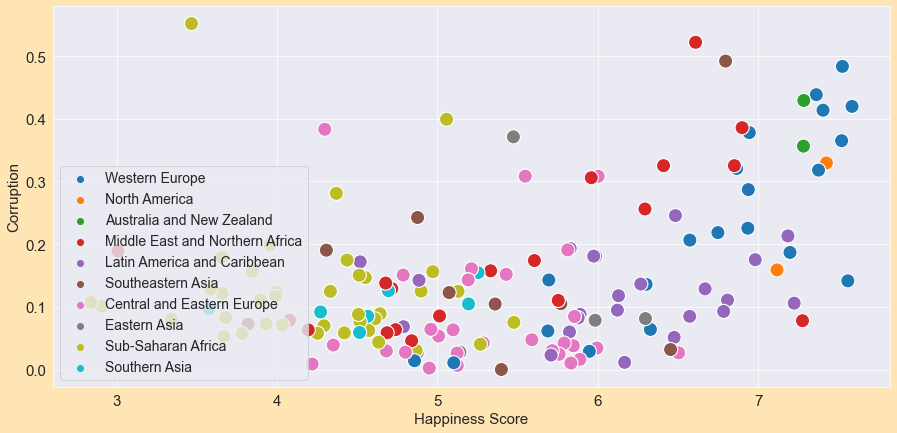

In [52]:
#plot for the Corruption versus Happiness

plt.rcParams['figure.figsize'] =(15, 7)
sns.scatterplot(x= happy_df.Happiness_Score, y=happy_df.Trust_Government_Corruption, hue=happy_df.Region, s=200)
plt.legend(loc='lower left', fontsize='14')
plt.ylabel('Corruption')
plt.xlabel('Happiness Score')


Text(0.5, 0, 'Happiness Score')

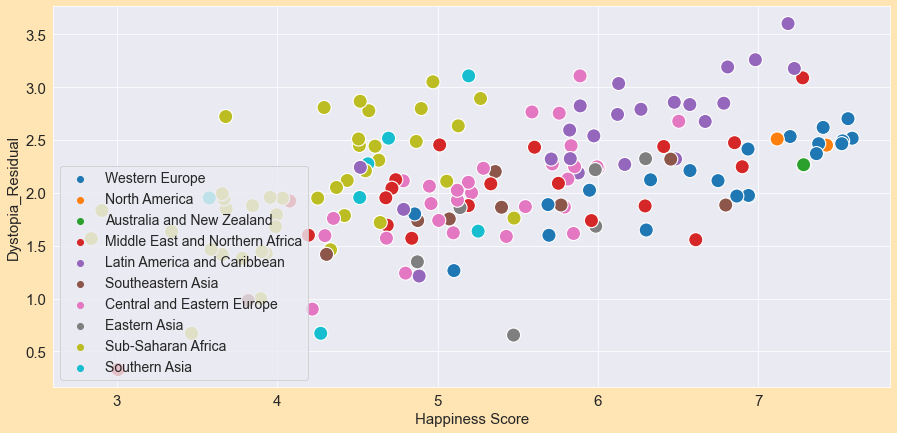

In [59]:
#plot for the Dystopia_Residual versus Happiness

plt.rcParams['figure.figsize'] =(15, 7)
sns.scatterplot(x= happy_df.Happiness_Score, y=happy_df.Dystopia_Residual, hue=happy_df.Region, s=200)
plt.legend(loc='lower left', fontsize='14')
plt.ylabel('Dystopia_Residual')
plt.xlabel('Happiness Score')